1. Data Loading and Initial Exploration

In [ ]:
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv("car_prices_cleaned.csv")

# Displaying basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26442 entries, 0 to 26441
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          26442 non-null  int64  
 1   make          26312 non-null  object 
 2   model         26311 non-null  object 
 3   trim          26195 non-null  object 
 4   body          25539 non-null  object 
 5   transmission  23406 non-null  object 
 6   vin           26441 non-null  object 
 7   state         26441 non-null  object 
 8   condition     18849 non-null  float64
 9   odometer      26406 non-null  float64
 10  color         26362 non-null  object 
 11  interior      26362 non-null  object 
 12  seller        26441 non-null  object 
 13  mmr           26441 non-null  float64
 14  sellingprice  26441 non-null  float64
 15  saledate      26441 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 3.2+ MB
None
               year     condition       odometer 

2. Feature Engineering

In [ ]:
from datetime import datetime
import pandas as pd

# Converting 'saledate' to datetime objects, handling timezone information
df['saledate'] = pd.to_datetime(df['saledate'], utc=True) # Add utc=True to handle timezone-aware datetimes

# Calculating car age
current_year = datetime.now().year
df['car_age'] = current_year - df['year']

# Extracting month and year from sale_date
df['sale_month'] = df['saledate'].dt.month
df['sale_year'] = df['saledate'].dt.year

<ipython-input-29-664571c48844>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True) # Add utc=True to handle timezone-aware datetimes
<ipython-input-29-664571c48844>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = current_year - df['year']
<ipython-input-29-664571c48844>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

3. Univariate Analysis

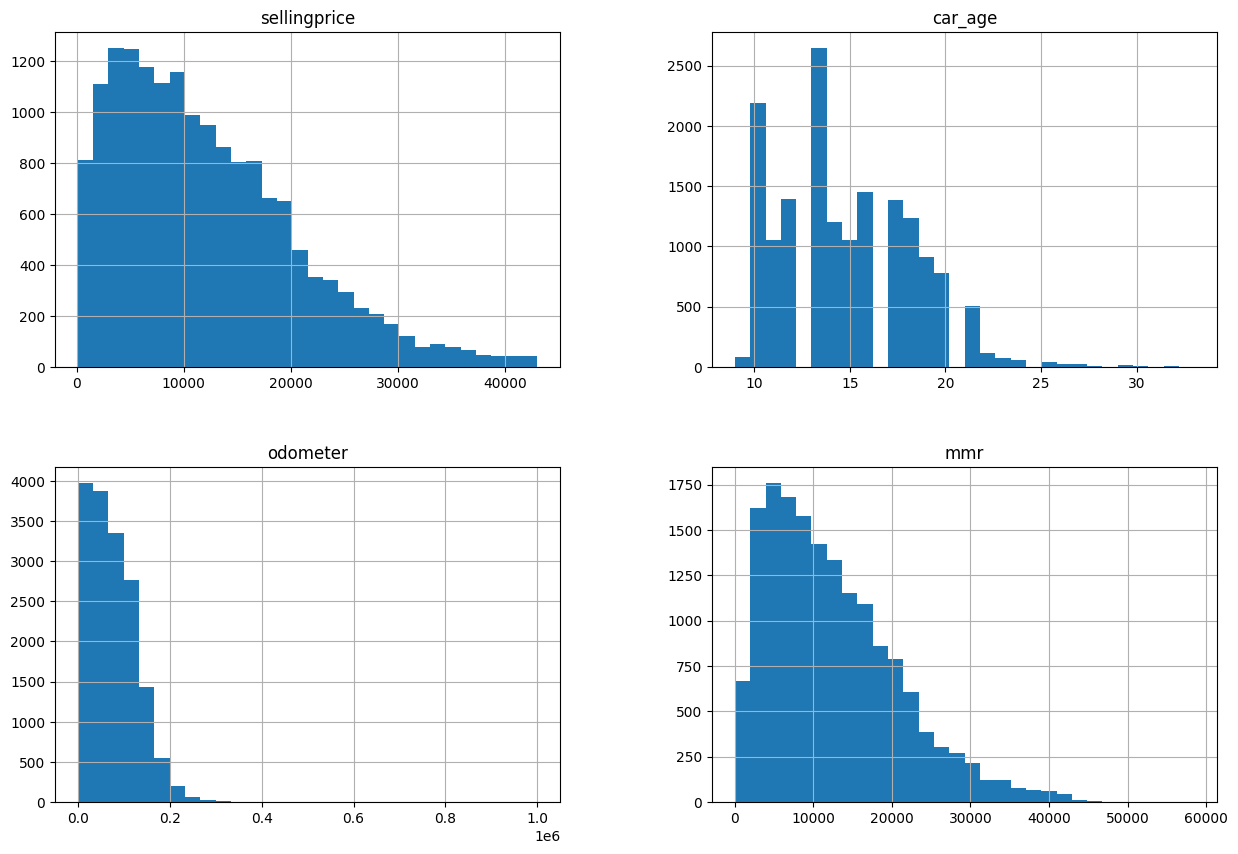

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
numerical_features = ['sellingprice', 'car_age', 'odometer', 'mmr']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

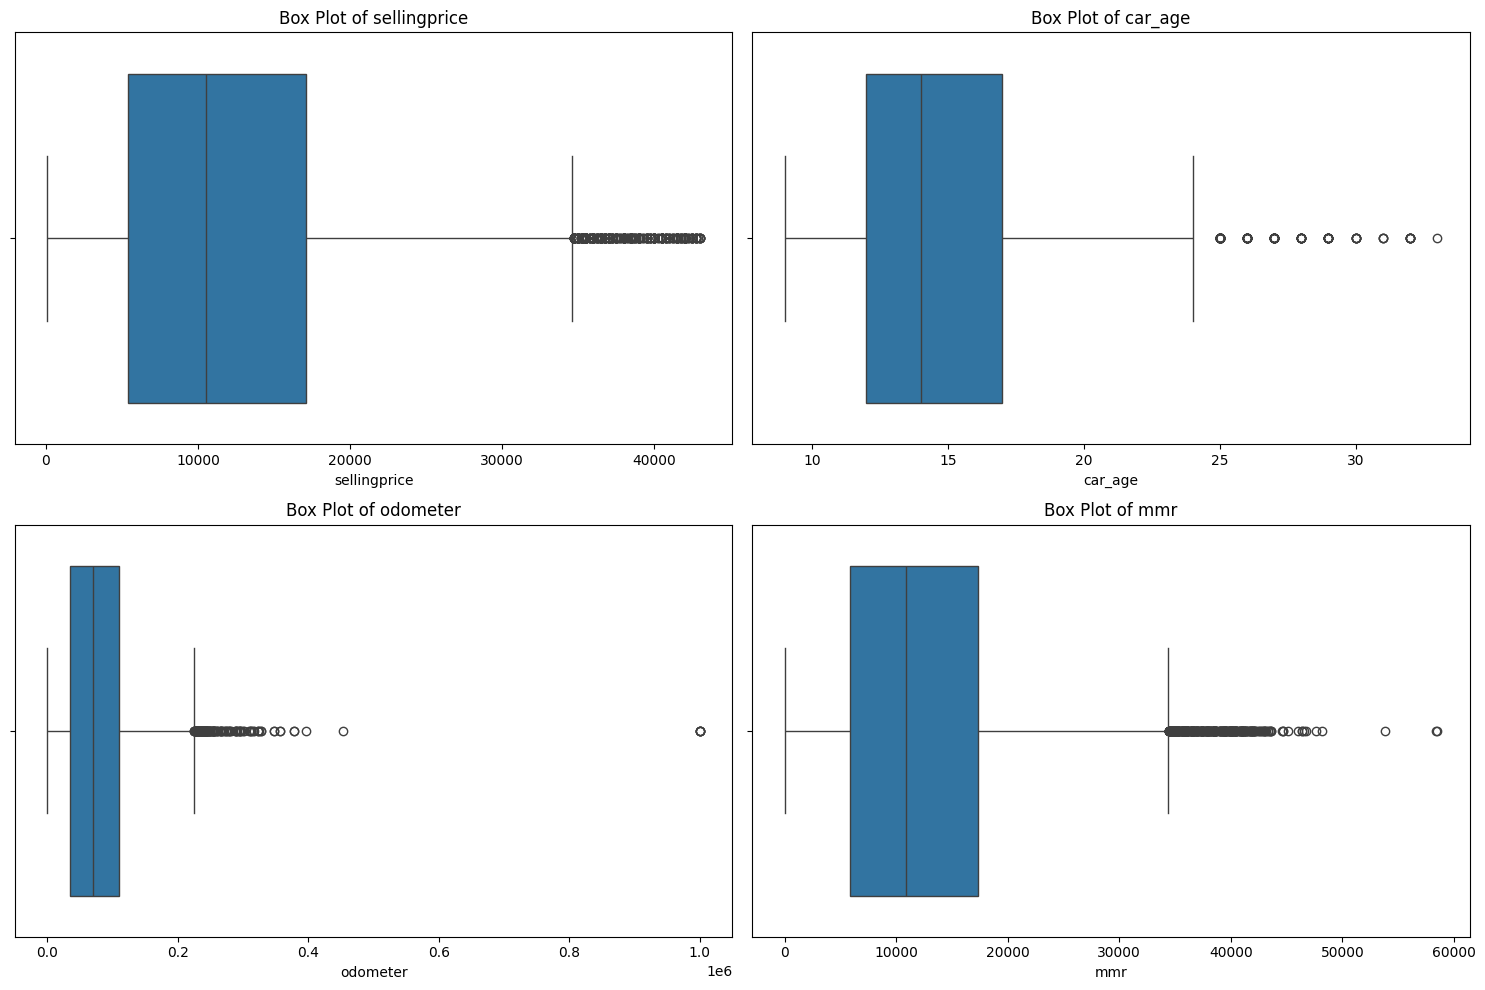

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

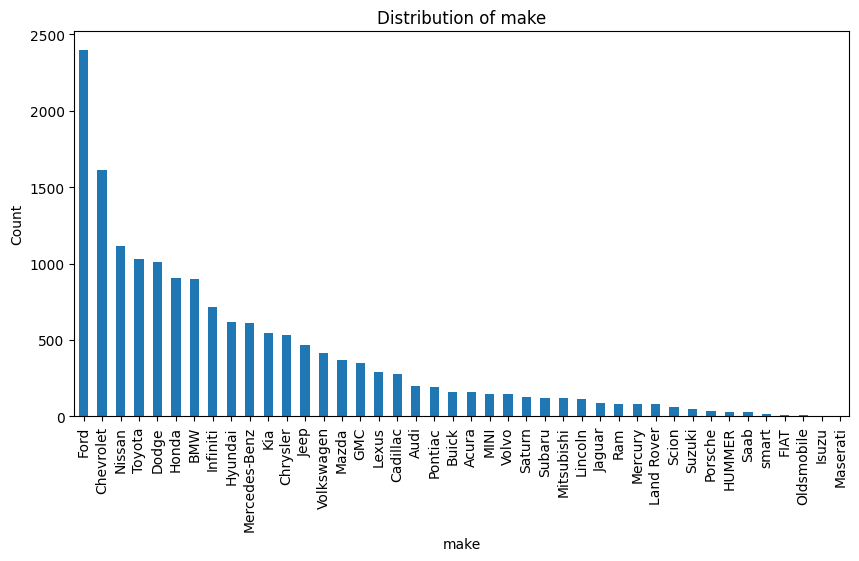

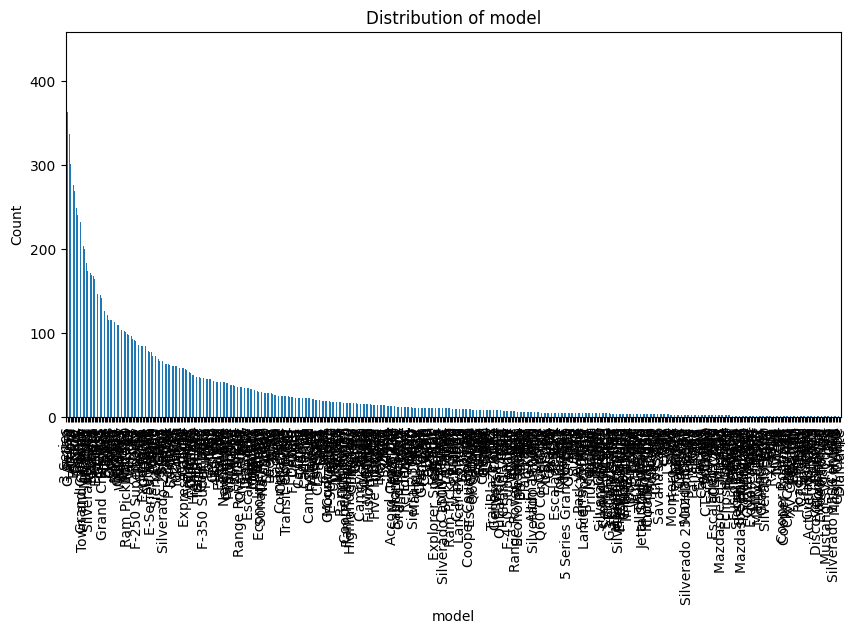

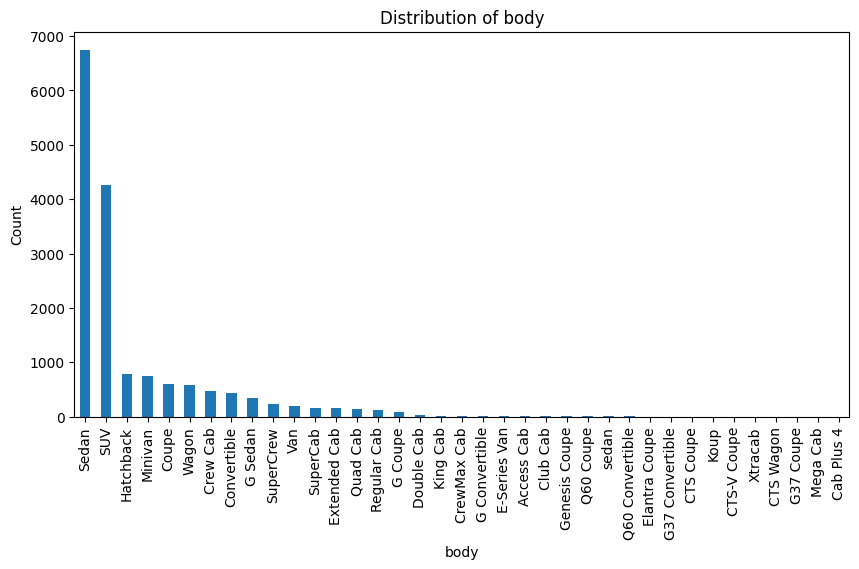

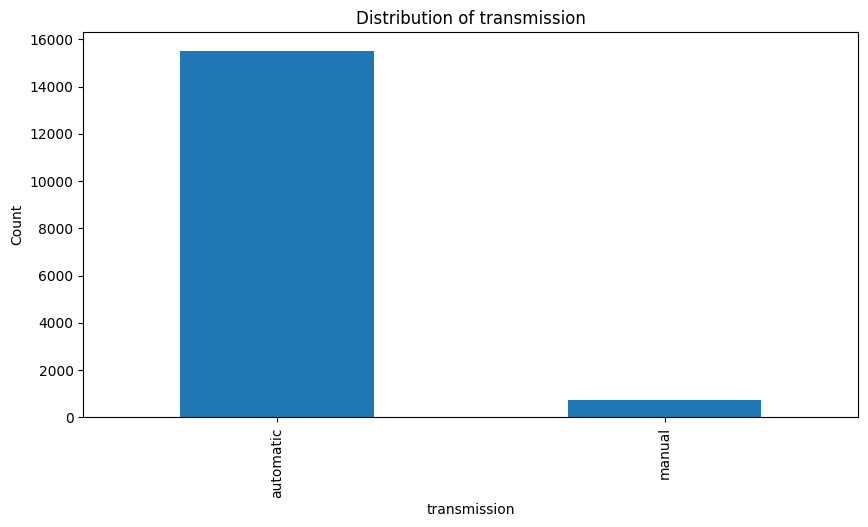

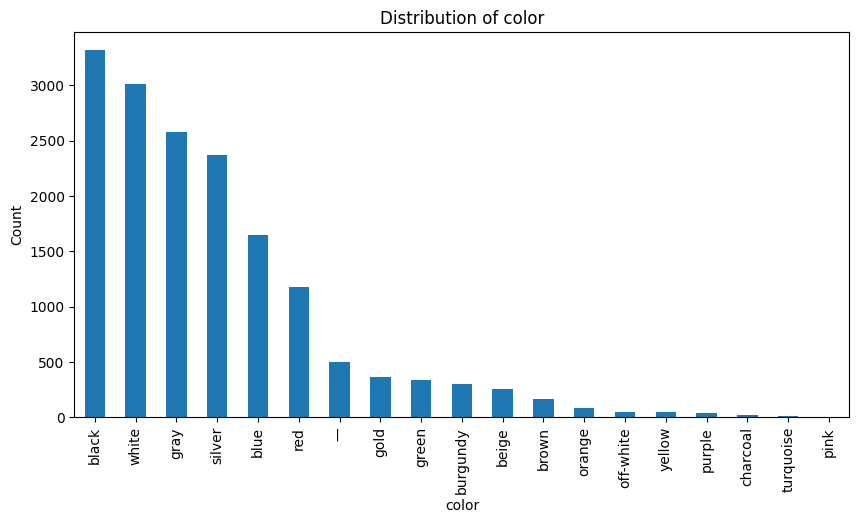

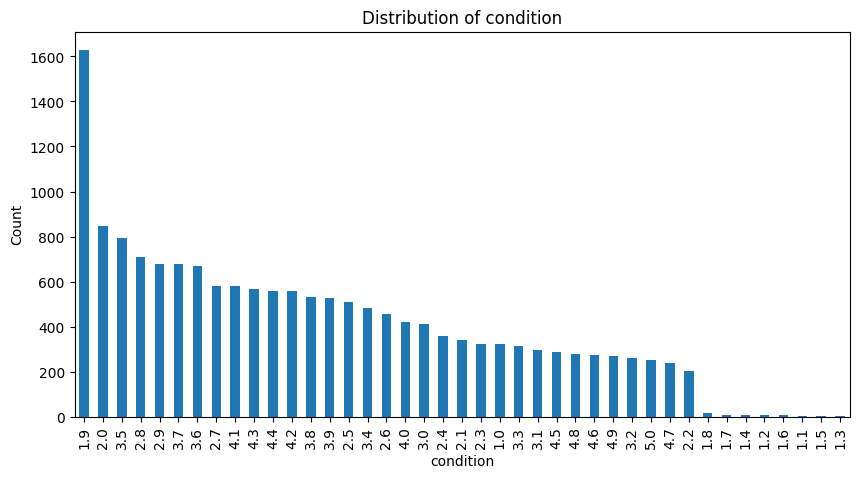

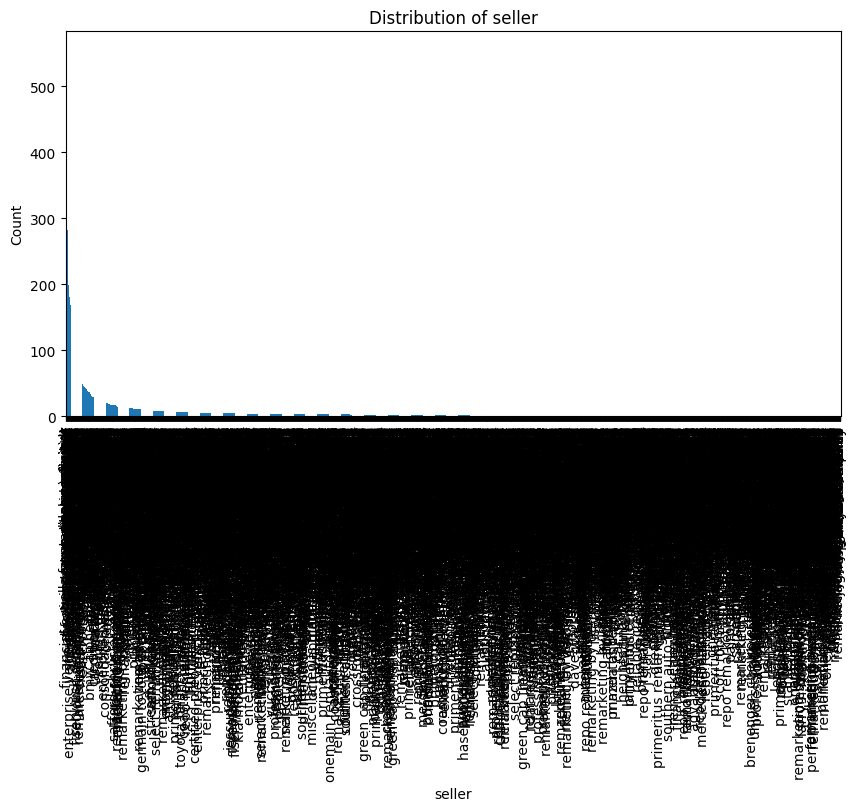

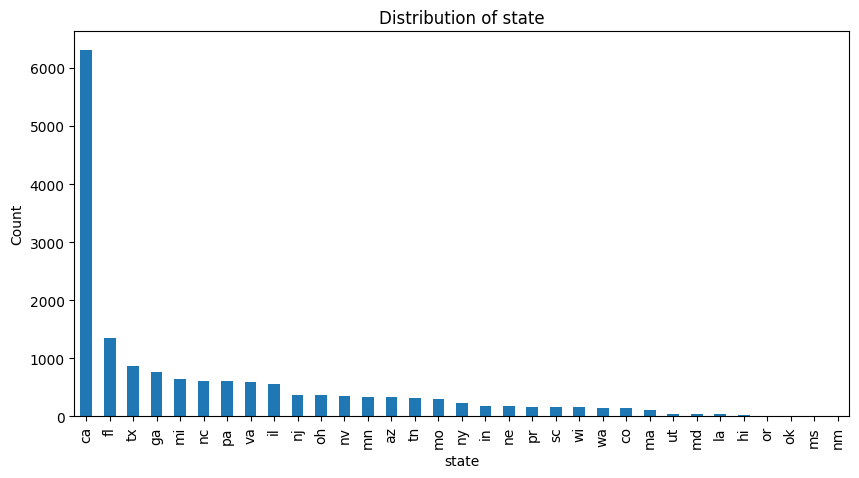

In [ ]:
# Bar charts for categorical features
categorical_features = ['make', 'model', 'body', 'transmission', 'color', 'condition', 'seller', 'state']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

4. Bivariate Analysis


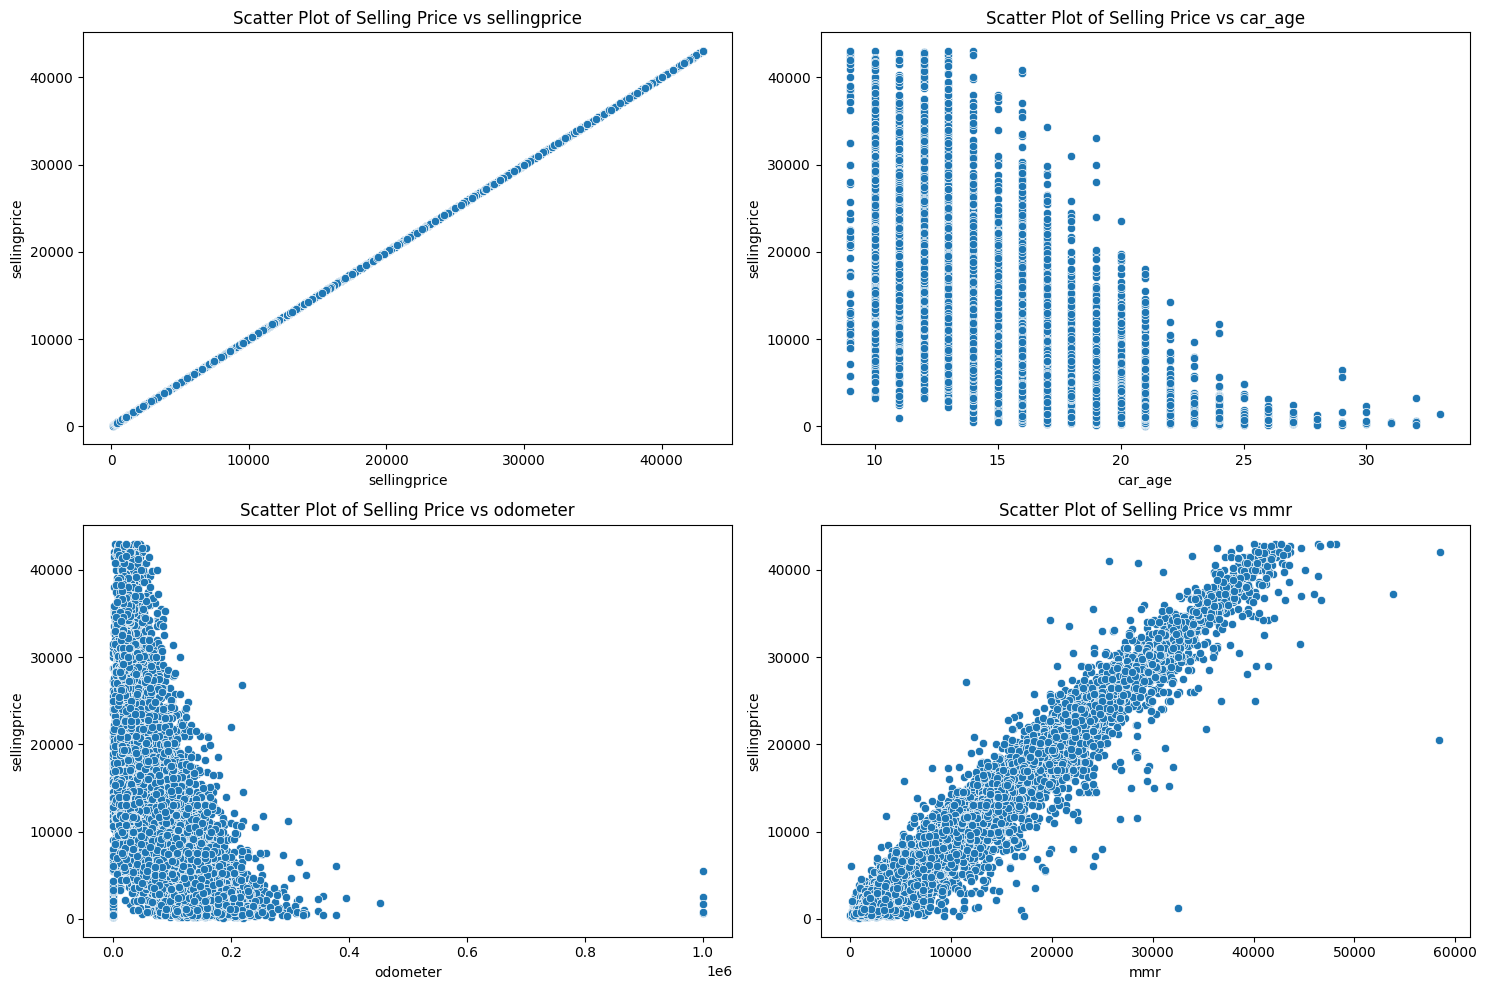

In [ ]:
# Scatter plots for numerical features against selling price
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['sellingprice'])
    plt.title(f'Scatter Plot of Selling Price vs {feature}')
plt.tight_layout()
plt.show()

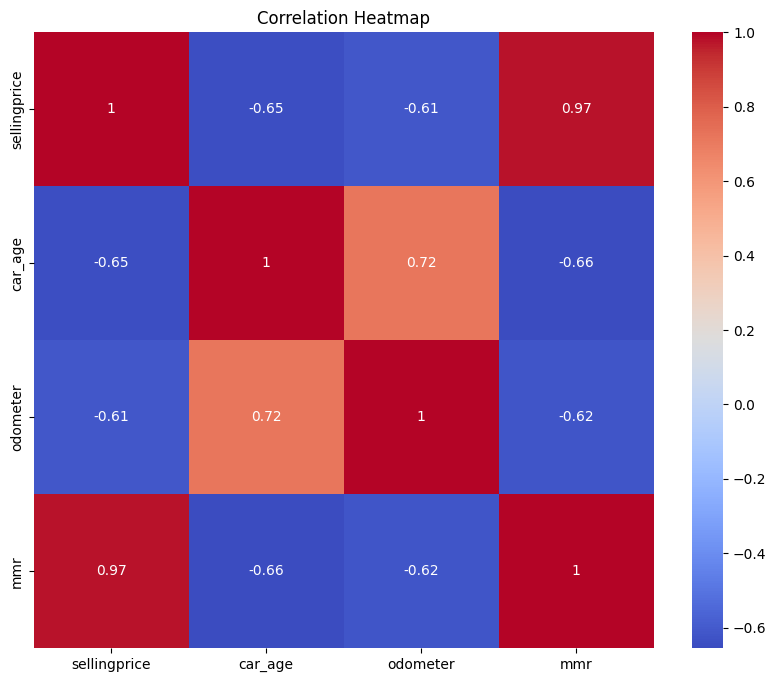

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

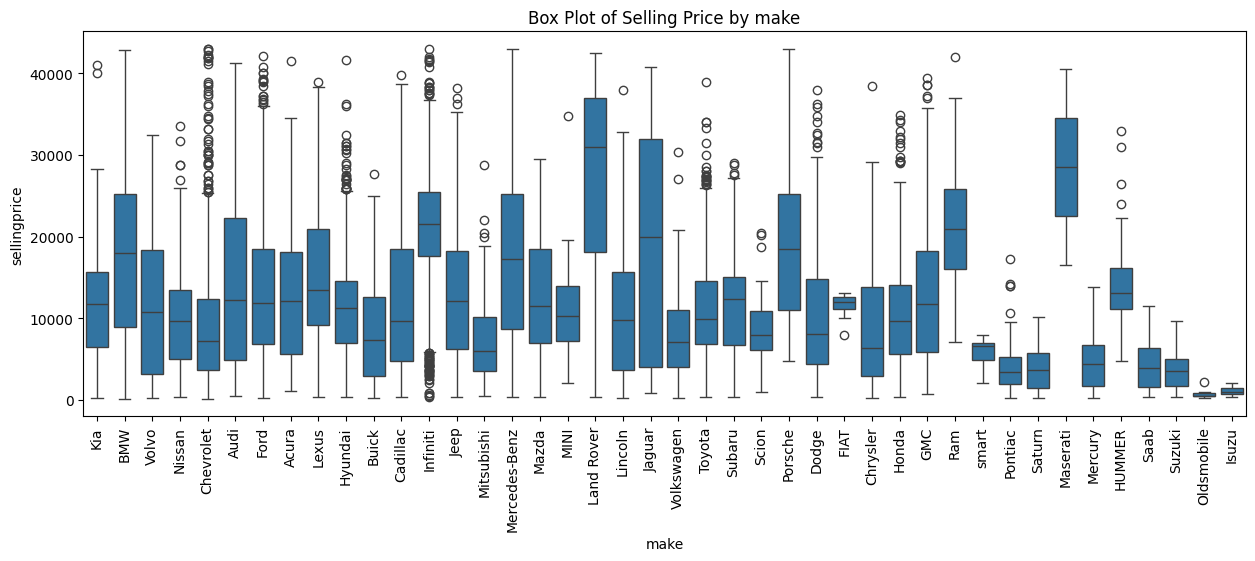

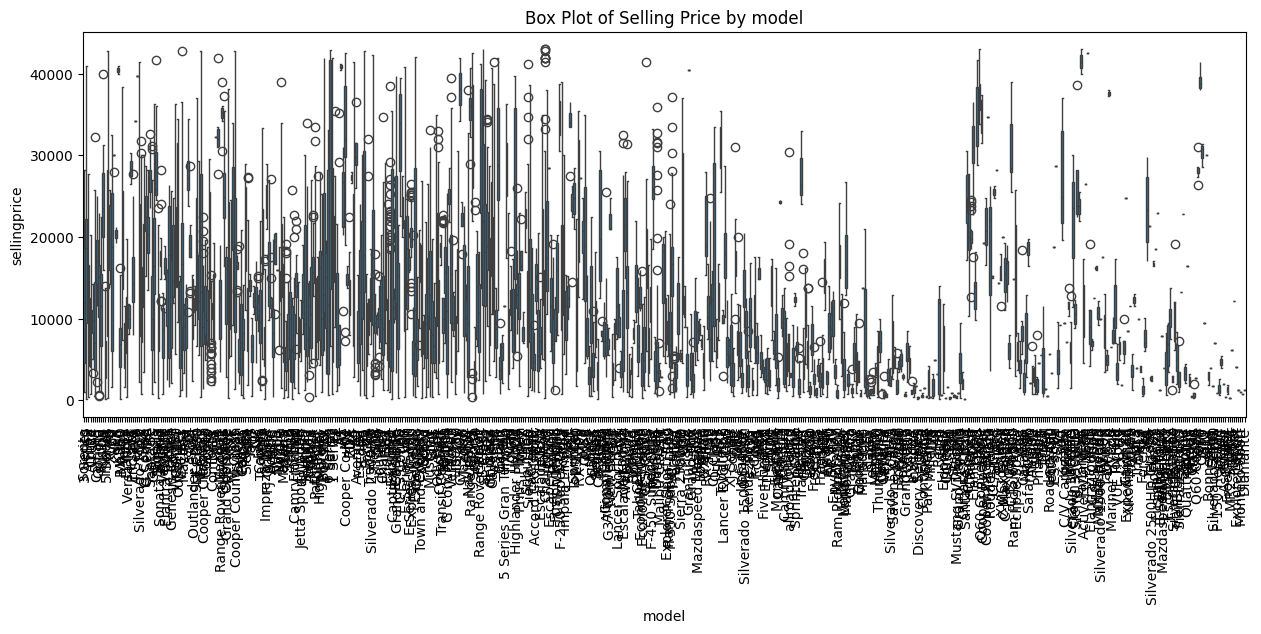

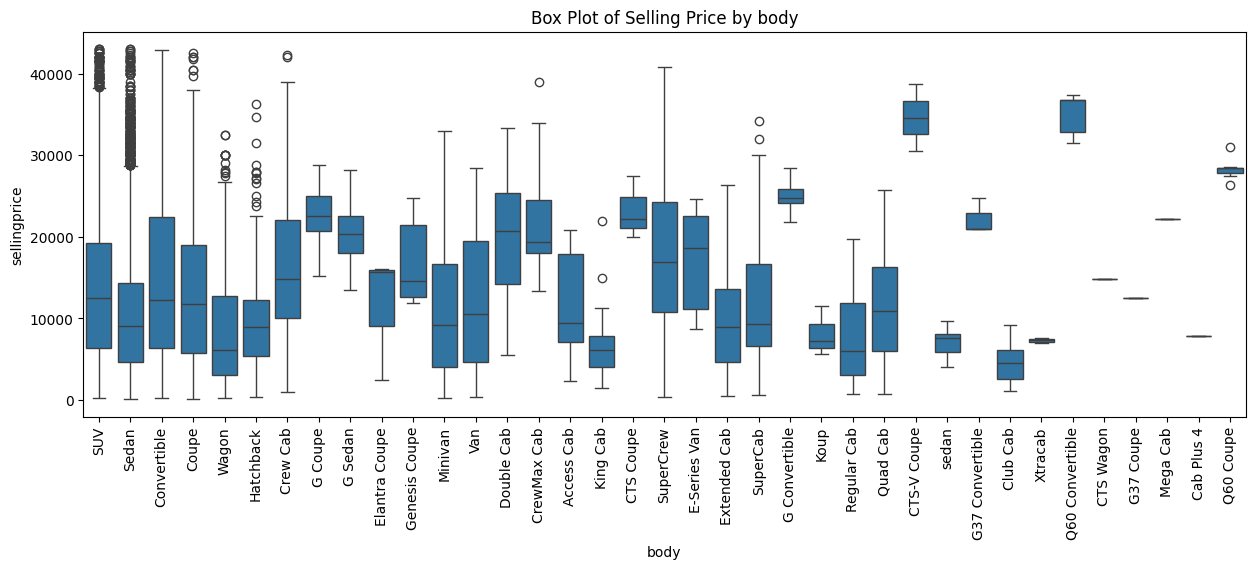

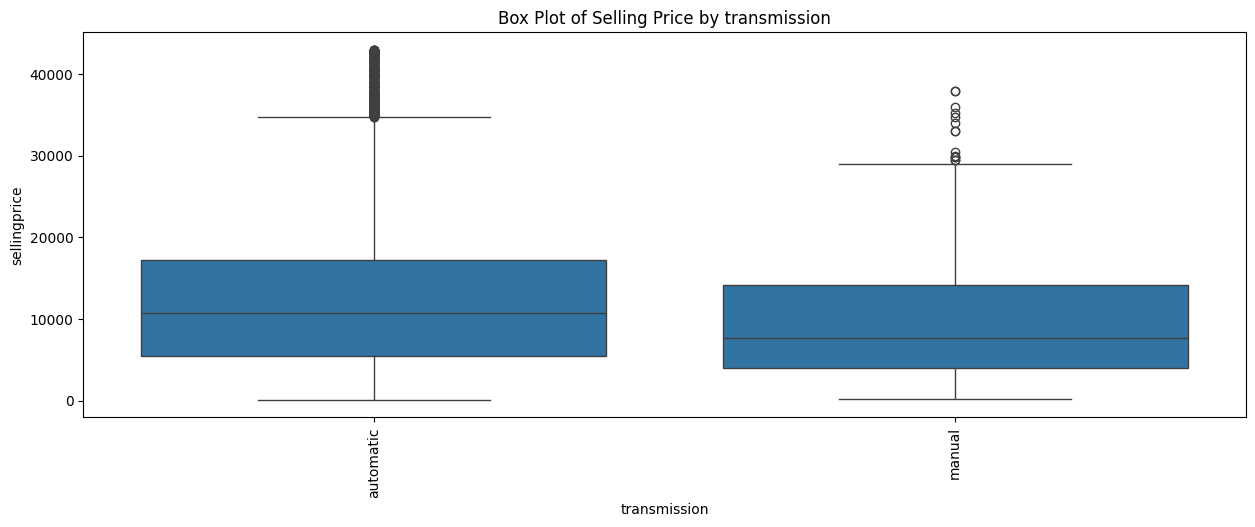

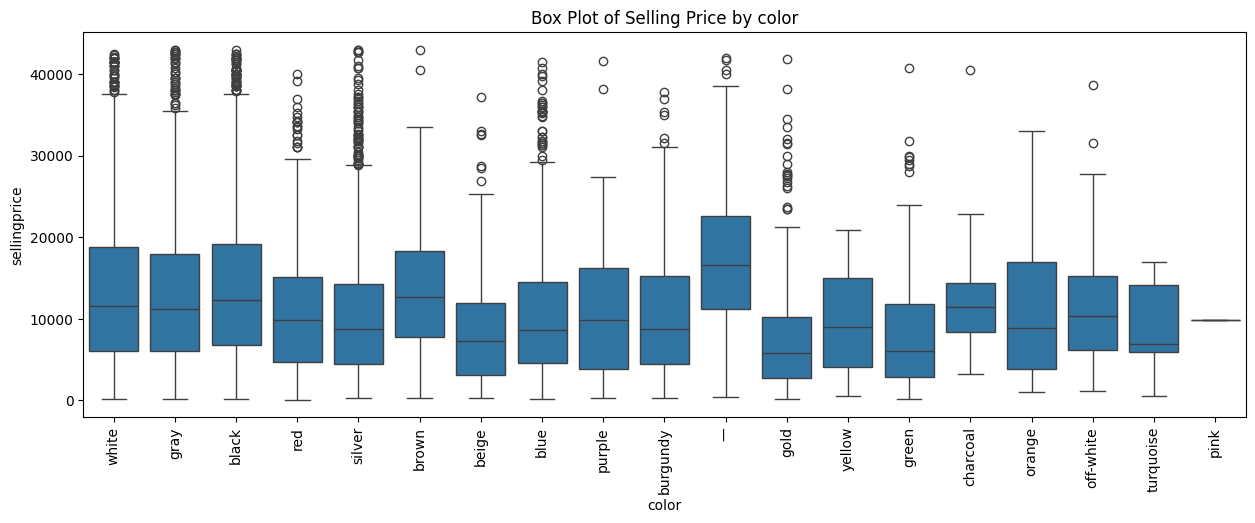

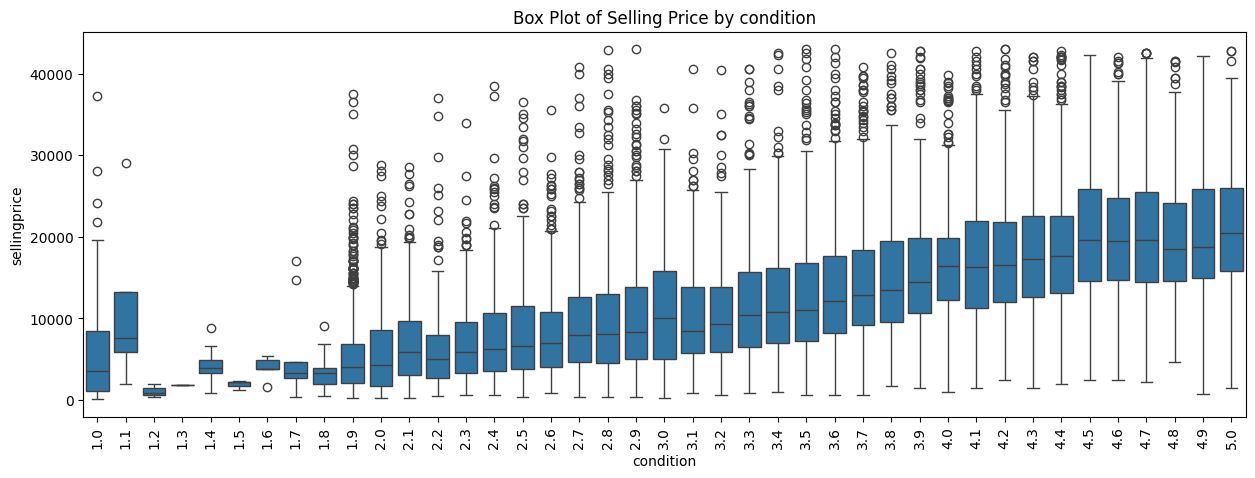

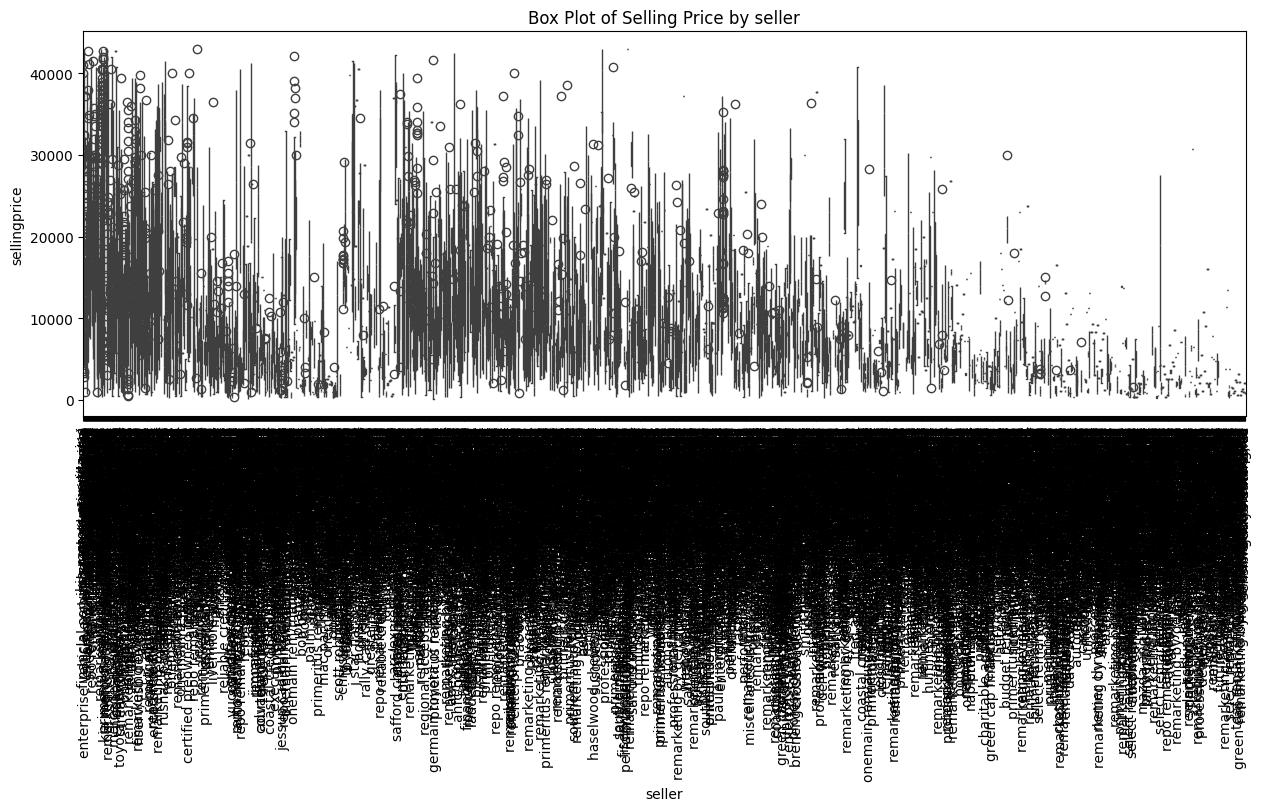

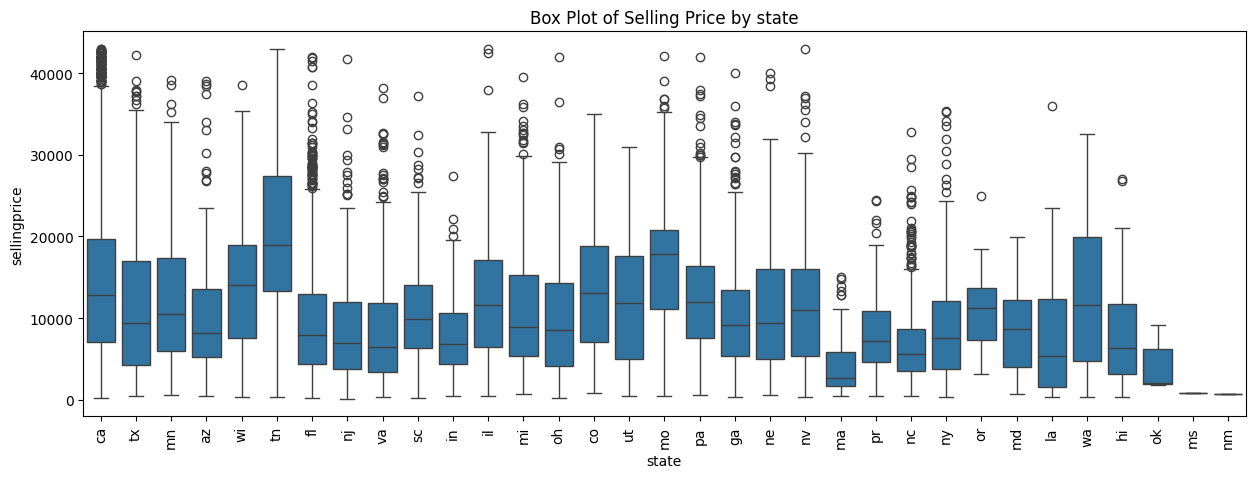

In [ ]:
# Box plots for categorical features against selling price
for feature in categorical_features:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=df[feature], y=df['sellingprice'])
    plt.title(f'Box Plot of Selling Price by {feature}')
    plt.xticks(rotation=90)
    plt.show()

5. Multivariate Analysis

In [ ]:
# Group-wise analysis for categorical features
for feature in categorical_features:
    grouped_df = df.groupby(feature)['sellingprice'].agg(['mean', 'median', 'count']).reset_index()
    print(f'Group-wise Analysis for {feature}')
    print(grouped_df.head())

Group-wise Analysis for make
       make          mean   median  count
0     Acura  12637.261146  12100.0    157
1      Audi  14279.250000  12200.0    200
2       BMW  18161.388889  18000.0    900
3     Buick   8428.593750   7300.0    160
4  Cadillac  11981.857143   9600.0    280
Group-wise Analysis for model
      model          mean   median  count
0  1 Series  18666.666667  17250.0     18
1      1500  19873.770492  18900.0     61
2       200  10128.378378  10400.0     37
3      2500  28560.714286  28850.0     14
4  3 Series  16691.304348  18600.0    437
Group-wise Analysis for body
          body          mean   median  count
0   Access Cab  11727.272727   9400.0     11
1    CTS Coupe  23233.333333  22200.0      3
2    CTS Wagon  14800.000000  14800.0      1
3  CTS-V Coupe  34625.000000  34625.0      2
4   Cab Plus 4   7900.000000   7900.0      1
Group-wise Analysis for transmission
  transmission          mean   median  count
0    automatic  12196.361775  10700.0  15529
1       man

6. Feature Importance Analysis

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Preparing data for modeling
X = df.drop(columns=['sellingprice', 'vin', 'saledate'])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['sellingprice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Importance'])
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
print('Random Forest Feature Importance:')
print(rf_importance.head(10))

Random Forest Feature Importance:
            Importance
mmr           0.953848
condition     0.015430
odometer      0.005459
car_age       0.000857
year          0.000844
state_ca      0.000580
sale_month    0.000497
state_pr      0.000303
trim_LX       0.000301
sale_year     0.000300
